In [4]:
# warngling
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100

# visualization
from matplotlib import pyplot as plt
plt.style.use("ggplot")
import seaborn as sns

# mapping
import fiona
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from shapely.geometry import Point

from pprint import pprint

# census

## import census data

In [5]:
# load entry_us data
path="../data/census/B05005_period_of_entry_by_nativity_and_citizenship_status_in_the_united_states.csv"
entry_us_df = pd.read_csv(path)
print(entry_us_df.shape)
entry_us_df.head()

(58, 25)


,geography,total,total_entered_2010_or_later,total_entered_2010_or_later_native,total_entered_2010_or_later_foreign_born,total_entered_2010_or_later_foreign_born_naturalized_u.s._citizen,total_entered_2010_or_later_foreign_born_not_a_u.s._citizen,total_entered_2000_to_2009,total_entered_2000_to_2009_native,total_entered_2000_to_2009_foreign_born,total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen,total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen,total_entered_1990_to_1999,total_entered_1990_to_1999_native,total_entered_1990_to_1999_foreign_born,total_entered_1990_to_1999_foreign_born_naturalized_u.s._citizen,total_entered_1990_to_1999_foreign_born_not_a_u.s._citizen,total_entered_before_1990,total_entered_before_1990_native,total_entered_before_1990_foreign_born,total_entered_before_1990_foreign_born_naturalized_u.s._citizen,total_entered_before_1990_foreign_born_not_a_u.s._citizen,name,state,county
0,0500000US06049,675,31,4,27,0,27,243,0,243,23,220,121,8,113,0,113,280,22,258,105,153,"Modoc County, California",6,49
1,0500000US06047,70193,4903,178,4725,554,4171,16993,342,16651,3770,12881,17777,267,17510,5411,12099,30520,1202,29318,17054,12264,"Merced County, California",6,47
2,0500000US06033,6252,296,40,256,30,226,1432,140,1292,172,1120,1511,70,1441,728,713,3013,397,2616,1672,944,"Lake County, California",6,33
3,0500000US06043,1370,131,21,110,17,93,418,13,405,56,349,164,0,164,119,45,657,128,529,359,170,"Mariposa County, California",6,43
4,0500000US06115,10103,834,169,665,0,665,2619,278,2341,624,1717,2666,131,2535,1024,1511,3984,438,3546,2697,849,"Yuba County, California",6,115


In [8]:
# load age sex data
path="../data/census/B05003_sex_by_age_by_nativity_and_citizenship_status.csv"
age_sex_df = pd.read_csv(path)
print(age_sex_df.shape)
age_sex_df.head()

(58, 27)


,geography,total,total_male,total_male_under_18_years,total_male_under_18_years_native,total_male_under_18_years_foreign_born,total_male_under_18_years_foreign_born_naturalized_u.s._citizen,total_male_under_18_years_foreign_born_not_a_u.s._citizen,total_male_18_years_and_over,total_male_18_years_and_over_native,total_male_18_years_and_over_foreign_born,total_male_18_years_and_over_foreign_born_naturalized_u.s._citizen,total_male_18_years_and_over_foreign_born_not_a_u.s._citizen,total_female,total_female_under_18_years,total_female_under_18_years_native,total_female_under_18_years_foreign_born,total_female_under_18_years_foreign_born_naturalized_u.s._citizen,total_female_under_18_years_foreign_born_not_a_u.s._citizen,total_female_18_years_and_over,total_female_18_years_and_over_native,total_female_18_years_and_over_foreign_born,total_female_18_years_and_over_foreign_born_naturalized_u.s._citizen,total_female_18_years_and_over_foreign_born_not_a_u.s._citizen,name,state,county
0,0500000US06049,9017,4659,965,935,30,0,30,3694,3289,405,81,324,4358,793,786,7,0,7,3565,3366,199,47,152,"Modoc County, California",6,49
1,0500000US06047,267390,135045,40933,39378,1555,312,1243,94112,61238,32874,12842,20032,132345,38931,37371,1560,460,1100,93414,61199,32215,13175,19040,"Merced County, California",6,47
2,0500000US06033,64095,31788,6635,6570,65,0,65,25153,22291,2862,1136,1726,32307,6493,6342,151,35,116,25814,23287,2527,1431,1096,"Lake County, California",6,33
3,0500000US06043,17658,8863,1526,1516,10,0,10,7337,6781,556,248,308,8795,1376,1356,20,0,20,7419,6797,622,303,319,"Mariposa County, California",6,43
4,0500000US06115,74644,38081,10883,10736,147,19,128,27198,22901,4297,2062,2235,36563,9782,9665,117,0,117,26781,22255,4526,2264,2262,"Yuba County, California",6,115


In [19]:
# load citizenship data
path="../data/census/B05001_nativity_and_citizenship_status_in_the_united_states.csv"
citizen_df = pd.read_csv(path)
print(citizen_df.shape)
citizen_df.head()

(58, 10)


,geography,total,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name,state,county
0,0500000US06049,9017,8342,3,31,128,513,"Modoc County, California",6,49
1,0500000US06047,267390,197197,269,1720,26789,41415,"Merced County, California",6,47
2,0500000US06033,64095,57843,29,618,2602,3003,"Lake County, California",6,33
3,0500000US06043,17658,16288,0,162,551,657,"Mariposa County, California",6,43
4,0500000US06115,74644,64541,129,887,4345,4742,"Yuba County, California",6,115


In [144]:
# drop overlapping columns
overlap = ["geography", "name", "state", "county"]
age_sex_df.drop(overlap, axis=1, inplace=True)
entry_us_df.drop(overlap, axis=1, inplace=True)

# concat
cs_agg_df = pd.concat([citizen_df, age_sex_df, entry_us_df], axis=1)
cs_agg_df.head()

,geography,total,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name,state,county,total,total_male,total_male_under_18_years,total_male_under_18_years_native,total_male_under_18_years_foreign_born,total_male_under_18_years_foreign_born_naturalized_u.s._citizen,total_male_under_18_years_foreign_born_not_a_u.s._citizen,total_male_18_years_and_over,total_male_18_years_and_over_native,total_male_18_years_and_over_foreign_born,total_male_18_years_and_over_foreign_born_naturalized_u.s._citizen,total_male_18_years_and_over_foreign_born_not_a_u.s._citizen,total_female,total_female_under_18_years,total_female_under_18_years_native,total_female_under_18_years_foreign_born,total_female_under_18_years_foreign_born_naturalized_u.s._citizen,total_female_under_18_years_foreign_born_not_a_u.s._citizen,total_female_18_years_and_over,total_female_18_years_and_over_native,total_female_18_years_and_over_foreign_born,total_female_18_years_and_over_foreign_born_naturalized_u.s._citizen,total_female_18_years_and_over_foreign_born_not_a_u.s._citizen,total,total_entered_2010_or_later,total_entered_2010_or_later_native,total_entered_2010_or_later_foreign_born,total_entered_2010_or_later_foreign_born_naturalized_u.s._citizen,total_entered_2010_or_later_foreign_born_not_a_u.s._citizen,total_entered_2000_to_2009,total_entered_2000_to_2009_native,total_entered_2000_to_2009_foreign_born,total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen,total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen,total_entered_1990_to_1999,total_entered_1990_to_1999_native,total_entered_1990_to_1999_foreign_born,total_entered_1990_to_1999_foreign_born_naturalized_u.s._citizen,total_entered_1990_to_1999_foreign_born_not_a_u.s._citizen,total_entered_before_1990,total_entered_before_1990_native,total_entered_before_1990_foreign_born,total_entered_before_1990_foreign_born_naturalized_u.s._citizen,total_entered_before_1990_foreign_born_not_a_u.s._citizen
0,0500000US06049,9017,8342,3,31,128,513,"Modoc County, California",6,49,9017,4659,965,935,30,0,30,3694,3289,405,81,324,4358,793,786,7,0,7,3565,3366,199,47,152,675,31,4,27,0,27,243,0,243,23,220,121,8,113,0,113,280,22,258,105,153
1,0500000US06047,267390,197197,269,1720,26789,41415,"Merced County, California",6,47,267390,135045,40933,39378,1555,312,1243,94112,61238,32874,12842,20032,132345,38931,37371,1560,460,1100,93414,61199,32215,13175,19040,70193,4903,178,4725,554,4171,16993,342,16651,3770,12881,17777,267,17510,5411,12099,30520,1202,29318,17054,12264
2,0500000US06033,64095,57843,29,618,2602,3003,"Lake County, California",6,33,64095,31788,6635,6570,65,0,65,25153,22291,2862,1136,1726,32307,6493,6342,151,35,116,25814,23287,2527,1431,1096,6252,296,40,256,30,226,1432,140,1292,172,1120,1511,70,1441,728,713,3013,397,2616,1672,944
3,0500000US06043,17658,16288,0,162,551,657,"Mariposa County, California",6,43,17658,8863,1526,1516,10,0,10,7337,6781,556,248,308,8795,1376,1356,20,0,20,7419,6797,622,303,319,1370,131,21,110,17,93,418,13,405,56,349,164,0,164,119,45,657,128,529,359,170
4,0500000US06115,74644,64541,129,887,4345,4742,"Yuba County, California",6,115,74644,38081,10883,10736,147,19,128,27198,22901,4297,2062,2235,36563,9782,9665,117,0,117,26781,22255,4526,2264,2262,10103,834,169,665,0,665,2619,278,2341,624,1717,2666,131,2535,1024,1511,3984,438,3546,2697,849


## create features

In [145]:
cs_agg_df["entered_before_2009_non-citizen"] = cs_agg_df["total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen"] + \
                                               cs_agg_df["total_entered_1990_to_1999_foreign_born_not_a_u.s._citizen"] + \
                                               cs_agg_df["total_entered_before_1990_foreign_born_not_a_u.s._citizen"]

cs_agg_df["entered_before_2009_naturalized"] = cs_agg_df["total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen"] + \
                                               cs_agg_df["total_entered_1990_to_1999_foreign_born_naturalized_u.s._citizen"] + \
                                               cs_agg_df["total_entered_before_1990_foreign_born_naturalized_u.s._citizen"]

cs_agg_df["entered_before_2009_foreign_born"] = cs_agg_df["entered_before_2009_non-citizen"] + \
                                                cs_agg_df["entered_before_2009_naturalized"]

In [146]:
cs_agg_df["non-citizen_over_18"] = cs_agg_df["total_female_18_years_and_over_foreign_born_not_a_u.s._citizen"] +\
                                   cs_agg_df["total_male_18_years_and_over_foreign_born_not_a_u.s._citizen"]

cs_agg_df["naturalized_over_18"] = cs_agg_df["total_female_18_years_and_over_foreign_born_naturalized_u.s._citizen"] +\
                                   cs_agg_df["total_male_18_years_and_over_foreign_born_naturalized_u.s._citizen"]

cs_agg_df["foreign_born_over_18"] = cs_agg_df["non-citizen_over_18"] + cs_agg_df["naturalized_over_18"]

In [168]:
cs_agg_df["naturalized_rate_over_18"] = cs_agg_df["naturalized_over_18"] / cs_agg_df["foreign_born_over_18"] 

cs_agg_df["growing_rate"] = cs_agg_df["total_entered_2000_to_2009_foreign_born"] /\
                            cs_agg_df["total_entered_2010_or_later_foreign_born"]

cs_agg_df["log_non-citizen_over_18"] = np.log(cs_agg_df["non-citizen_over_18"])

print(cs_agg_df.shape)
cs_agg_df.sort_values("naturalized_rate_over_18").tail()

(58, 64)


,geography,total,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name,state,county,total,total_male,total_male_under_18_years,total_male_under_18_years_native,total_male_under_18_years_foreign_born,total_male_under_18_years_foreign_born_naturalized_u.s._citizen,total_male_under_18_years_foreign_born_not_a_u.s._citizen,total_male_18_years_and_over,total_male_18_years_and_over_native,total_male_18_years_and_over_foreign_born,total_male_18_years_and_over_foreign_born_naturalized_u.s._citizen,total_male_18_years_and_over_foreign_born_not_a_u.s._citizen,total_female,total_female_under_18_years,total_female_under_18_years_native,total_female_under_18_years_foreign_born,total_female_under_18_years_foreign_born_naturalized_u.s._citizen,total_female_under_18_years_foreign_born_not_a_u.s._citizen,total_female_18_years_and_over,total_female_18_years_and_over_native,total_female_18_years_and_over_foreign_born,total_female_18_years_and_over_foreign_born_naturalized_u.s._citizen,total_female_18_years_and_over_foreign_born_not_a_u.s._citizen,total,total_entered_2010_or_later,total_entered_2010_or_later_native,total_entered_2010_or_later_foreign_born,total_entered_2010_or_later_foreign_born_naturalized_u.s._citizen,total_entered_2010_or_later_foreign_born_not_a_u.s._citizen,total_entered_2000_to_2009,total_entered_2000_to_2009_native,total_entered_2000_to_2009_foreign_born,total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen,total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen,total_entered_1990_to_1999,total_entered_1990_to_1999_native,total_entered_1990_to_1999_foreign_born,total_entered_1990_to_1999_foreign_born_naturalized_u.s._citizen,total_entered_1990_to_1999_foreign_born_not_a_u.s._citizen,total_entered_before_1990,total_entered_before_1990_native,total_entered_before_1990_foreign_born,total_entered_before_1990_foreign_born_naturalized_u.s._citizen,total_entered_before_1990_foreign_born_not_a_u.s._citizen,entered_before_2009_non-citizen,entered_before_2009_naturalized,entered_before_2009_foreign_born,non-citizen_over_18,naturalized_over_18,foreign_born_over_18,naturalized_rate_over_18,growing_rate,log_not_a_u.s._citizen,log_non-citizen_over_18
27,0500000US06003,1203,1153,3,24,14,9,"Alpine County, California",6,3,1203,664,138,137,1,1,0,526,511,15,7,8,539,120,120,0,0,0,419,412,7,6,1,50,22,12,10,1,9,7,6,1,1,0,5,0,5,5,0,16,9,7,7,0,0,13,13,9,13,22,0.590909,0.100000,2.197225,2.197225
40,0500000US06095,434981,338098,2246,7268,51275,36094,"Solano County, California",6,95,434981,216074,50422,48329,2093,668,1425,165652,127288,38364,21946,16418,218907,48476,46861,1615,650,965,170431,125134,45297,28011,17286,96883,8599,841,7758,936,6822,22847,1518,21329,9010,12319,21376,1354,20022,11422,8600,44061,5801,38260,29907,8353,29272,50339,79611,33704,49957,83661,0.597136,2.749291,10.493882,10.425372
21,0500000US06075,864263,544392,2212,17117,188038,112504,"San Francisco County, California",6,75,864263,440633,59296,55059,4237,1550,2687,381337,241295,140042,84047,55995,423630,56656,52686,3970,1209,2761,366974,214681,152293,101232,51061,319871,47877,2990,44887,4005,40882,71320,3767,67553,27896,39657,69572,3284,66288,49170,17118,131102,9288,121814,106967,14847,71622,184033,255655,107056,185279,292335,0.633790,1.504957,11.630744,11.581107
37,0500000US06061,374985,329483,730,4249,25425,15098,"Placer County, California",6,61,374985,183021,43512,42392,1120,557,563,139509,121322,18187,11076,7111,191964,41767,40756,1011,392,619,150197,129992,20205,13400,6805,45502,4203,442,3761,472,3289,11176,600,10576,4665,5911,10535,583,9952,6515,3437,19588,3354,16234,13773,2461,11809,24953,36762,13916,24476,38392,0.637529,2.812018,9.622318,9.540795
55,0500000US06109,53899,50920,24,435,1626,894,"Tuolumne County, California",6,109,53899,28029,4611,4599,12,0,12,23418,22099,1319,732,587,25870,44

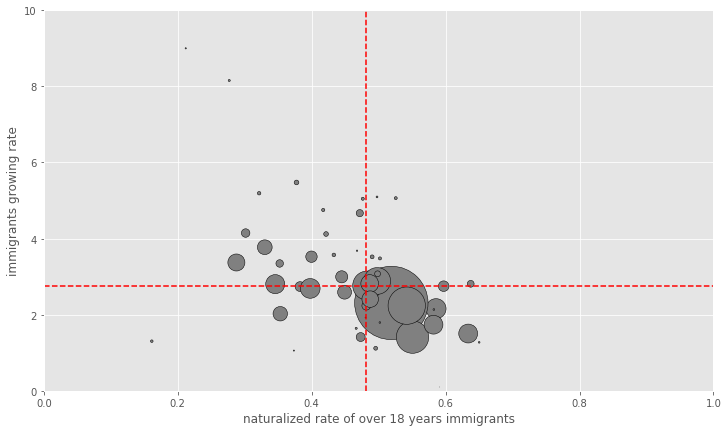

In [169]:
med_gorwing_rate = np.nanmedian(cs_agg_df["growing_rate"])
med_naturalized_rate = np.median(cs_agg_df["naturalized_rate_over_18"])

fig,ax = plt.subplots(figsize=(12,7))

ax.scatter("naturalized_rate_over_18", "growing_rate", data=cs_agg_df,
            s=cs_agg_df["non-citizen_over_18"]/300, c="gray",
            linewidths=0.5, edgecolors="black")
ax.axhline(med_gorwing_rate, color="red", ls="dashed")
ax.axvline(med_naturalized_rate, color="red", ls="dashed")
ax.set_xlim(0,1)
ax.set_ylim(0,10)
ax.set_xlabel("naturalized rate of over 18 years immigrants")
ax.set_ylabel("immigrants growing rate")
plt.savefig("figure/growing_rate_and_naturalized_rate.png")

In [170]:
cs_agg_df[(cs_agg_df["growing_rate"] > med_gorwing_rate) &
          (cs_agg_df["naturalized_rate_over_18"] < med_naturalized_rate)]

,geography,total,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name,state,county,total,total_male,total_male_under_18_years,total_male_under_18_years_native,total_male_under_18_years_foreign_born,total_male_under_18_years_foreign_born_naturalized_u.s._citizen,total_male_under_18_years_foreign_born_not_a_u.s._citizen,total_male_18_years_and_over,total_male_18_years_and_over_native,total_male_18_years_and_over_foreign_born,total_male_18_years_and_over_foreign_born_naturalized_u.s._citizen,total_male_18_years_and_over_foreign_born_not_a_u.s._citizen,total_female,total_female_under_18_years,total_female_under_18_years_native,total_female_under_18_years_foreign_born,total_female_under_18_years_foreign_born_naturalized_u.s._citizen,total_female_under_18_years_foreign_born_not_a_u.s._citizen,total_female_18_years_and_over,total_female_18_years_and_over_native,total_female_18_years_and_over_foreign_born,total_female_18_years_and_over_foreign_born_naturalized_u.s._citizen,total_female_18_years_and_over_foreign_born_not_a_u.s._citizen,total,total_entered_2010_or_later,total_entered_2010_or_later_native,total_entered_2010_or_later_foreign_born,total_entered_2010_or_later_foreign_born_naturalized_u.s._citizen,total_entered_2010_or_later_foreign_born_not_a_u.s._citizen,total_entered_2000_to_2009,total_entered_2000_to_2009_native,total_entered_2000_to_2009_foreign_born,total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen,total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen,total_entered_1990_to_1999,total_entered_1990_to_1999_native,total_entered_1990_to_1999_foreign_born,total_entered_1990_to_1999_foreign_born_naturalized_u.s._citizen,total_entered_1990_to_1999_foreign_born_not_a_u.s._citizen,total_entered_before_1990,total_entered_before_1990_native,total_entered_before_1990_foreign_born,total_entered_before_1990_foreign_born_naturalized_u.s._citizen,total_entered_before_1990_foreign_born_not_a_u.s._citizen,entered_before_2009_non-citizen,entered_before_2009_naturalized,entered_before_2009_foreign_born,non-citizen_over_18,naturalized_over_18,foreign_born_over_18,naturalized_rate_over_18,growing_rate,log_not_a_u.s._citizen,log_non-citizen_over_18
0,0500000US06049,9017,8342,3,31,128,513,"Modoc County, California",6,49,9017,4659,965,935,30,0,30,3694,3289,405,81,324,4358,793,786,7,0,7,3565,3366,199,47,152,675,31,4,27,0,27,243,0,243,23,220,121,8,113,0,113,280,22,258,105,153,486,128,614,476,128,604,0.211921,9.000000,6.240276,6.165418
1,0500000US06047,267390,197197,269,1720,26789,41415,"Merced County, California",6,47,267390,135045,40933,39378,1555,312,1243,94112,61238,32874,12842,20032,132345,38931,37371,1560,460,1100,93414,61199,32215,13175,19040,70193,4903,178,4725,554,4171,16993,342,16651,3770,12881,17777,267,17510,5411,12099,30520,1202,29318,17054,12264,37244,26235,63479,39072,26017,65089,0.399714,3.524021,10.631398,10.573161
2,0500000US06033,64095,57843,29,618,2602,3003,"Lake County, California",6,33,64095,31788,6635,6570,65,0,65,25153,22291,2862,1136,1726,32307,6493,6342,151,35,116,25814,23287,2527,1431,1096,6252,296,40,256,30,226,1432,140,1292,172,1120,1511,70,1441,728,713,3013,397,2616,1672,944,2777,2572,5349,2822,2567,5389,0.476341,5.046875,8.007367,7.945201
3,0500000US06043,17658,16288,0,162,551,657,"Mariposa County, California",6,43,17658,8863,1526,1516,10,0,10,7337,6781,556,248,308,8795,1376,1356,20,0,20,7419,6797,622,303,319,1370,131,21,110,17,93,418,13,405,56,349,164,0,164,119,45,657,128,529,359,170,564,534,1098,627,551,1178,0.467742,3.681818,6.487684,6.440947
6,0500000US06027,18195,16389,9,86,800,911,"Inyo County, California",6,27,18195,9172,1900,1880,20,0,20,7272,6419,853,404,449,9023,1808,1766,42,18,24,7215,6419,796,378,418,1806,130,17,113,9,104,336,0,336,30,306,478,18,460,201,259,862,60,802,560,242,807,791,1598,867,782,1649,0.474227,2.973

## import tract shp data

In [171]:
county_geodf = gpd.read_file("../data/map/cb_2017_us_county_20m/cb_2017_us_county_20m.shp")
county_geodf.columns = county_geodf.columns.str.lower()
county_geodf = county_geodf[county_geodf["statefp"] == "06"].sort_values("countyfp").reset_index(drop=True)

In [172]:
mtc_crs = {'init': 'epsg:4326'}
county_geodf = county_geodf.to_crs(mtc_crs)
county_geodf.head()

,statefp,countyfp,countyns,affgeoid,geoid,name,lsad,aland,awater,geometry
0,06,001,01675839,0500000US06001,06001,Alameda,06,1909616630,216916717,"POLYGON ((-122.333711 37.809797, -122.303931 3..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292631,12557304,"POLYGON ((-120.072484 38.50986899999999, -120...."
2,06,005,01675841,0500000US06005,06005,Amador,06,1539933576,29470568,"POLYGON ((-121.027507 38.508292, -120.813554 3..."
3,06,007,01675842,0500000US06007,06007,Butte,06,4238438196,105310997,"POLYGON ((-122.044865 39.883771, -121.804041 3..."
4,06,009,01675885,0500000US06009,06009,Calaveras,06,2641829199,43797662,"POLYGON ((-120.995497 38.225402, -120.892864 3..."


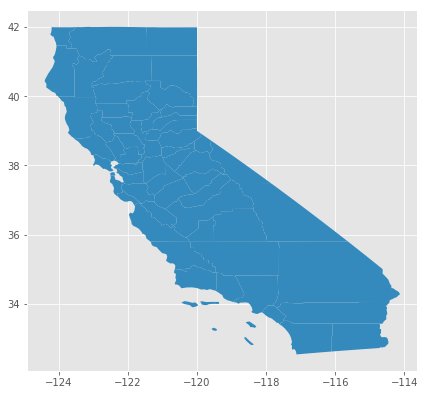

In [173]:
county_geodf.plot(figsize=(7,7))

## merge data

In [174]:
merge_geodf = pd.merge(county_geodf, cs_agg_df, left_on="affgeoid", right_on="geography")
print(merge_geodf.shape)
merge_geodf.head()

(58, 74)


,statefp,countyfp,countyns,affgeoid,geoid,name_x,lsad,aland,awater,geometry,geography,total,total_u.s._citizen_born_in_the_united_states,total_u.s._citizen_born_in_puerto_rico_or_u.s._island_areas,total_u.s._citizen_born_abroad_of_american_parent(s),total_u.s._citizen_by_naturalization,total_not_a_u.s._citizen,name_y,state,county,total,total_male,total_male_under_18_years,total_male_under_18_years_native,total_male_under_18_years_foreign_born,total_male_under_18_years_foreign_born_naturalized_u.s._citizen,total_male_under_18_years_foreign_born_not_a_u.s._citizen,total_male_18_years_and_over,total_male_18_years_and_over_native,total_male_18_years_and_over_foreign_born,total_male_18_years_and_over_foreign_born_naturalized_u.s._citizen,total_male_18_years_and_over_foreign_born_not_a_u.s._citizen,total_female,total_female_under_18_years,total_female_under_18_years_native,total_female_under_18_years_foreign_born,total_female_under_18_years_foreign_born_naturalized_u.s._citizen,total_female_under_18_years_foreign_born_not_a_u.s._citizen,total_female_18_years_and_over,total_female_18_years_and_over_native,total_female_18_years_and_over_foreign_born,total_female_18_years_and_over_foreign_born_naturalized_u.s._citizen,total_female_18_years_and_over_foreign_born_not_a_u.s._citizen,total,total_entered_2010_or_later,total_entered_2010_or_later_native,total_entered_2010_or_later_foreign_born,total_entered_2010_or_later_foreign_born_naturalized_u.s._citizen,total_entered_2010_or_later_foreign_born_not_a_u.s._citizen,total_entered_2000_to_2009,total_entered_2000_to_2009_native,total_entered_2000_to_2009_foreign_born,total_entered_2000_to_2009_foreign_born_naturalized_u.s._citizen,total_entered_2000_to_2009_foreign_born_not_a_u.s._citizen,total_entered_1990_to_1999,total_entered_1990_to_1999_native,total_entered_1990_to_1999_foreign_born,total_entered_1990_to_1999_foreign_born_naturalized_u.s._citizen,total_entered_1990_to_1999_foreign_born_not_a_u.s._citizen,total_entered_before_1990,total_entered_before_1990_native,total_entered_before_1990_foreign_born,total_entered_before_1990_foreign_born_naturalized_u.s._citizen,total_entered_before_1990_foreign_born_not_a_u.s._citizen,entered_before_2009_non-citizen,entered_before_2009_naturalized,entered_before_2009_foreign_born,non-citizen_over_18,naturalized_over_18,foreign_born_over_18,naturalized_rate_over_18,growing_rate,log_not_a_u.s._citizen,log_non-citizen_over_18
0,06,001,01675839,0500000US06001,06001,Alameda,06,1909616630,216916717,"POLYGON ((-122.333711 37.809797, -122.303931 3...",0500000US06001,1629615,1081065,4673,20061,276213,247603,"Alameda County, California",6,1,1629615,799649,176270,163686,12584,3083,9501,623379,382746,240633,125310,115323,829966,168642,155940,12702,3187,9515,661324,403427,257897,144633,113264,548550,88717,3083,85634,6100,79534,149841,4825,145016,51486,93530,128852,4080,124772,79804,44968,181140,12746,168394,138823,29571,168069,270113,438182,228587,269943,498530,0.541478,1.693440,12.419582,12.339672
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292631,12557304,"POLYGON ((-120.072484 38.50986899999999, -120....",0500000US06003,1203,1153,3,24,14,9,"Alpine County, California",6,3,1203,664,138,137,1,1,0,526,511,15,7,8,539,120,120,0,0,0,419,412,7,6,1,50,22,12,10,1,9,7,6,1,1,0,5,0,5,5,0,16,9,7,7,0,0,13,13,9,13,22,0.590909,0.100000,2.197225,2.197225
2,06,005,01675841,0500000US06005,06005,Amador,06,1539933576,29470568,"POLYGON ((-121.027507 38.508292, -120.813554 3...",0500000US06005,37306,34849,28,178,1308,943,"Amador County, California",6,5,37306,20005,2931,2872,59,25,34,17074,15795,1279,659,620,17301,2800,2759,41,30,11,14501,13629,872,594,278,2457,178,2,176,26,150,440,64,376,172,204,272,15,257,158,99,1567,125,1442,952,490,793,1282,2075,898,1253,2151,0.582520,2.136364,6.849066,6.800170
3,06,007,01675842,0500000US06007,06007,Butte,06,4238438196,105310997,"POLYGON ((-122.044865 39.883771, -121.804041 3...",0500000US06007,225207,206078,282,1672,8939,8236,"Butte County

In [175]:
merge_geodf = gpd.GeoDataFrame(merge_geodf, geometry="geometry", crs=county_geodf.crs)

## plot on map

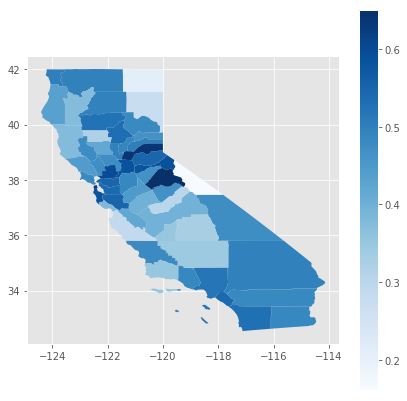

In [176]:
# static map

merge_geodf.plot(column="naturalized_rate_over_18", cmap="Blues", legend=True, figsize=(7,7))

In [177]:
merge_geodf.shape

(58, 74)

In [178]:
# interactive map

ca_coordinates = (37.16611, -119.44944)

ca_map = folium.Map(location=ca_coordinates, zoom_start=6)

# log of non-citizen population
folium.Choropleth(
    geo_data = merge_geodf.to_json(),
    data=merge_geodf,
    name="Log of over 18 years non-citizen population",
    columns=["county", "log_non-citizen_over_18"],
    key_on="feature.properties.county",
    fill_color="Oranges",
    legend_name="Log of over 18 years non-citizen population"
).add_to(ca_map)

# naturalization rate
folium.Choropleth(
    geo_data = merge_geodf.to_json(),
    data=merge_geodf,
    name="Naturalized rate of over 18 years immigrants",
    columns=["county", "naturalized_rate_over_18"],
    key_on="feature.properties.county",
    fill_color="Oranges",
    legend_name="Naturalized rate of over 18 years immigrants"
).add_to(ca_map)

# immigrant growing rate
folium.Choropleth(
    geo_data = merge_geodf.to_json(),
    data=merge_geodf,
    name="Immigrant growing rate",
    columns=["county", "growing_rate"],
    key_on="feature.properties.county",
    fill_color="Oranges",
    legend_name="Immigrant growing rate"
).add_to(ca_map)

folium.LayerControl(collapsed=False).add_to(ca_map)

ca_map.save("../asset_map/map_prop_of_non_citizen.html")

# CRLA office

## import crla office data

In [179]:
crla_office_df = pd.read_csv("../data/resources/crla_office_locations.csv", index_col=0)
crla_office_df.head()

,name,address,longitude,latitude
0,administrative office,"1430 franklin street, suite 103, oakland, ca 9...",-122.26919,37.804375
1,arvin,"211 bear mountain blvd., arvin, ca 93203",-118.82564,35.208841
2,coachella,"1460 6th street, p.o. box 35, coachella, ca 92236",-116.17685,33.678303
3,delano,"601 high street, suite c, delano, ca 93215",-119.24624,35.763884
4,el centro,"449 broadway st., el centro, ca 92243",-115.55365,32.793576


In [180]:
crs = {'init' :'epsg:4326'}
geometry = [Point(xy) for xy in zip(crla_office_df.longitude, crla_office_df.latitude)]
crla_office_geodf = gpd.GeoDataFrame(crla_office_df, crs=crs, geometry=geometry)
crla_office_geodf.head()

,name,address,longitude,latitude,geometry
0,administrative office,"1430 franklin street, suite 103, oakland, ca 9...",-122.26919,37.804375,POINT (-122.26919 37.804375)
1,arvin,"211 bear mountain blvd., arvin, ca 93203",-118.82564,35.208841,POINT (-118.82564 35.208841)
2,coachella,"1460 6th street, p.o. box 35, coachella, ca 92236",-116.17685,33.678303,POINT (-116.17685 33.678303)
3,delano,"601 high street, suite c, delano, ca 93215",-119.24624,35.763884,POINT (-119.24624 35.763884)
4,el centro,"449 broadway st., el centro, ca 92243",-115.55365,32.793576,POINT (-115.55365 32.793576)


## plot on map

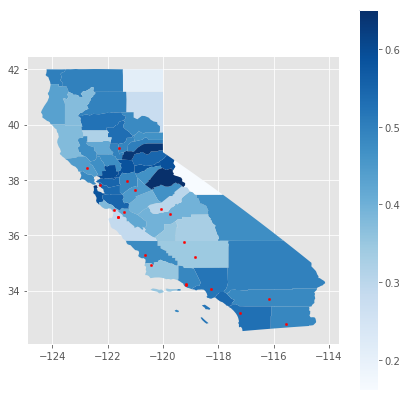

In [181]:
# static map

base = merge_geodf.plot(column="naturalized_rate_over_18", cmap="Blues", legend=True, figsize=(7,7))
crla_office_geodf.plot(ax=base, color="r", markersize=5)

In [182]:
# interactive map

for idx, row in crla_office_df.iterrows():
  folium.Marker(location=[row["latitude"], row["longitude"]],
                popup=row["name"],
                icon=folium.Icon(color='red', icon='building', prefix="fa")).add_to(ca_map)

ca_map.save("../asset_map/map_prop_of_non_citizen.html")